In [1]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset

In [4]:
image_dir = "Classification_dataset_v3/images/train"
for lable,class_dir in enumerate(os.listdir(image_dir)):
    print(lable,class_dir)

0 Cat
1 Dog
2 person


In [7]:
class ImageDataset(Dataset):
    def __init__(self,image_dir,transform=None):
        self.image_dir = image_dir
        self.image_paths = []
        self.labels = []
        self.class_name = {}
        self.transform = transform


        for label,class_dir in enumerate(os.listdir(image_dir)):
            self.class_name[label] = class_dir
            class_path = os.path.join(image_dir,class_dir)
            for image_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path,image_name))
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    

    def __getitem__(self, idx):
        img_path =  self.image_paths[idx] 
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)


        return image,label

In [8]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    ]
)

In [9]:
train_image_dir = "Classification_dataset_v3/images/train"
test_image_dir = "Classification_dataset_v3/images/test"
train_image_dataset = ImageDataset(image_dir=train_image_dir,transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir,transform=transform)

In [10]:
train_image_loader = DataLoader(dataset=train_image_dataset,batch_size=32,shuffle=True)
test_image_loader = DataLoader(dataset=test_image_dataset,batch_size=32,shuffle=True)

In [11]:
for images,labels in train_image_loader:
    print(images.shape,labels.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([3

In [14]:
from matplotlib import pyplot as plt
import numpy as np

In [13]:
print(train_image_dataset.class_name)
print(test_image_dataset.labels)

{0: 'Cat', 1: 'Dog', 2: 'person'}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


torch.Size([32, 3, 128, 128]) torch.Size([32])
Dog
(128, 128, 3)
1


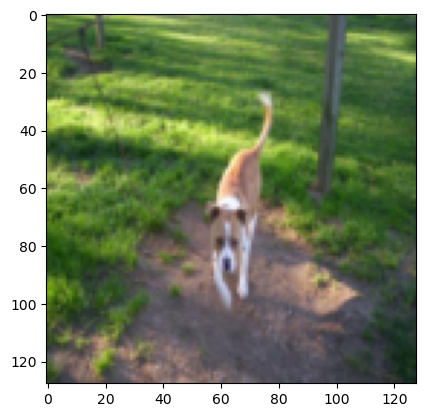

In [28]:
for images,labels in train_image_loader:
    print(images.shape,labels.shape)
    img = images[0].numpy()
    label = labels[0].item()
    print(train_image_dataset.class_name[label])
    img = np.transpose(img,(1,2,0))
    print(img.shape)
    print(label)
    plt.imshow(img,vmin=0,vmax=255)
    break